O objetivo desse notebook é entender melhor a estrutura dos dados, identificar padrões e possíveis insights relevantes para a modelagem dos dados.

Este notebook consome os CSVs já pré‑processados em `data/processed` e gera:

1. Verificação das distribuições de sentimentos 
2. Comprimento das reviews
3. Visualização das palavras mais frequentes por classe
4. Nuvem de palavras
5. Análise de palavras únicas (por classe)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain
from wordcloud import WordCloud

# Leitura do dataset pré‑processado
df = pd.read_csv("../data/processed/IMDB_cleaned_SpaCy.csv")

Porcentagem de cada classe: 
 sentiment
positive    50.187568
negative    49.812432
Name: proportion, dtype: float64


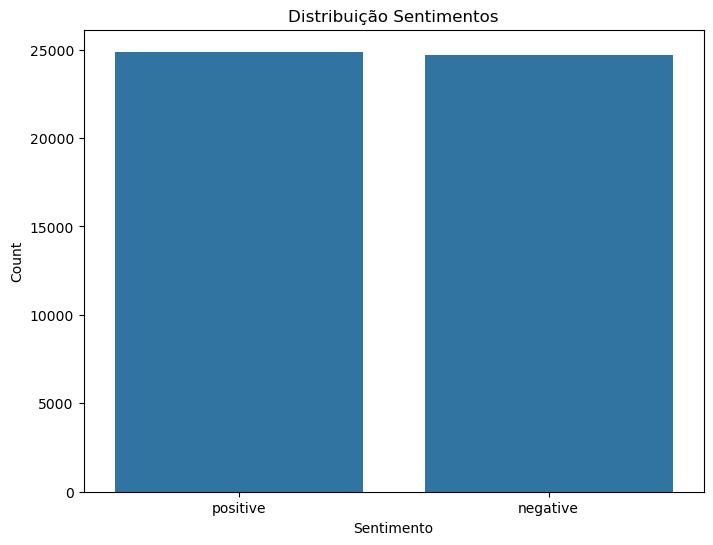

In [10]:
# 1. Distribuição de sentimentos
print("Porcentagem de cada classe: \n", df['sentiment'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribuição Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Count')
plt.show()

# Resultado: A distribuição entre reviews positivas e negativas está quase perfeitamente balanceada

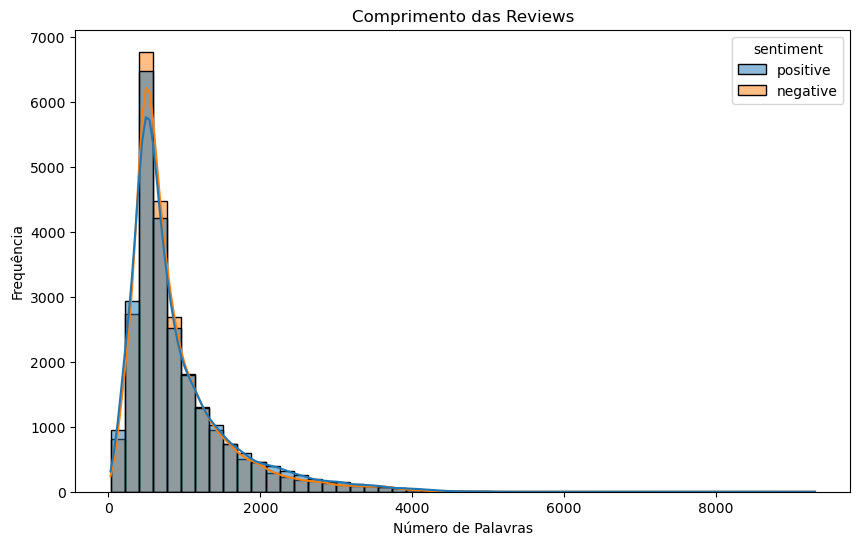

In [11]:
# 2. Comprimento das reviews
df['review_length'] = df['tokens'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Comprimento das Reviews')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()

# Resultado: As avaliações negativos possuem uma leve tendência a serem maiores que as positivas

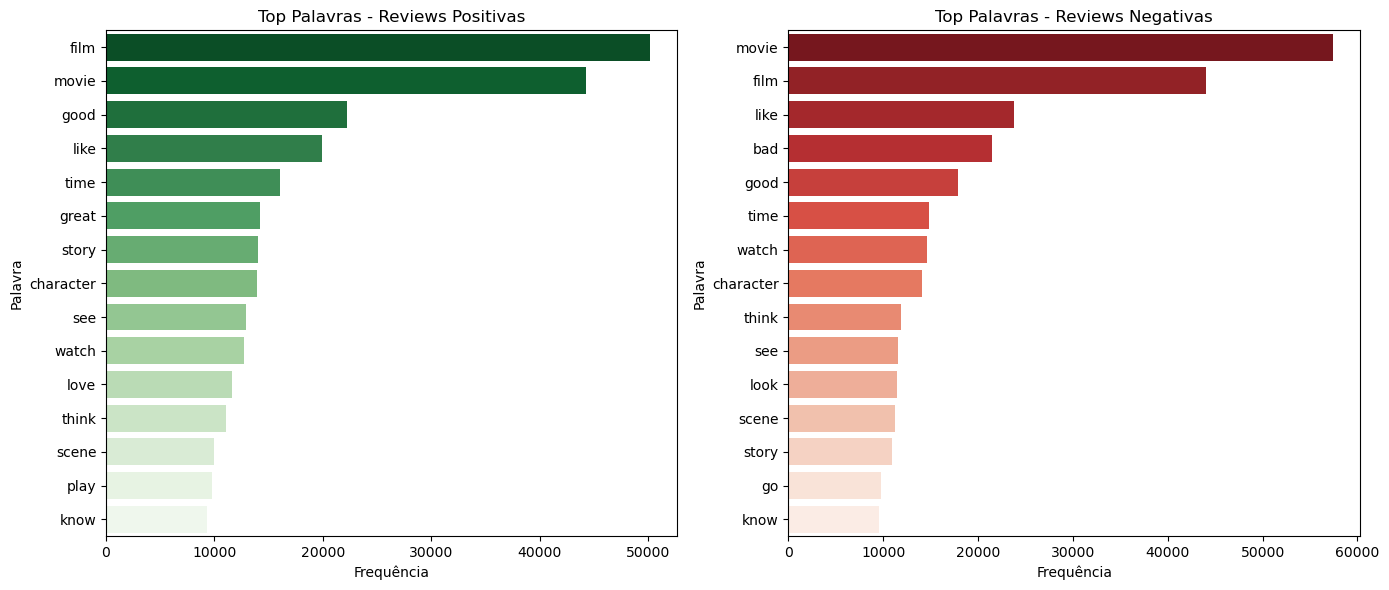

In [14]:
# 3. Top palavras por sentimento
reviews_pos = df[df['sentiment']=='positive']['clean_review']
reviews_neg = df[df['sentiment']=='negative']['clean_review']

text_pos = ' '.join(reviews_pos)
text_neg = ' '.join(reviews_neg)

counter_pos = Counter(text_pos.split())
counter_neg = Counter(text_neg.split())

top_pos = counter_pos.most_common(15)
top_neg = counter_neg.most_common(15)

plt.figure(figsize=(14, 6))

# positivas
plt.subplot(1, 2, 1)
sns.barplot(x=[c for w,c in top_pos], y=[w for w,c in top_pos], hue=[w for w, c in top_pos], palette='Greens_r')
plt.title('Top Palavras - Reviews Positivas')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

# negativas
plt.subplot(1, 2, 2)
sns.barplot(x=[c for w,c in top_neg], y=[w for w,c in top_neg], hue=[w for w, c in top_neg], palette='Reds_r')
plt.title('Top Palavras - Reviews Negativas')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

plt.tight_layout()
plt.show()

# Resultado: As reviews negativas e positivas possuem palavras que aparecem com recorrência muito em comum 

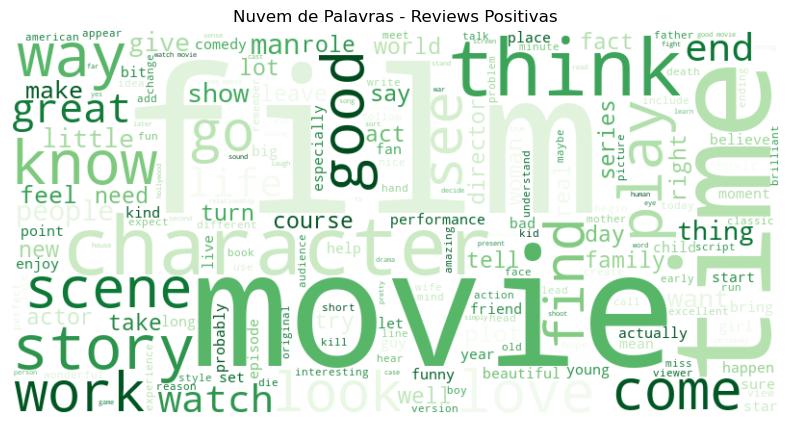

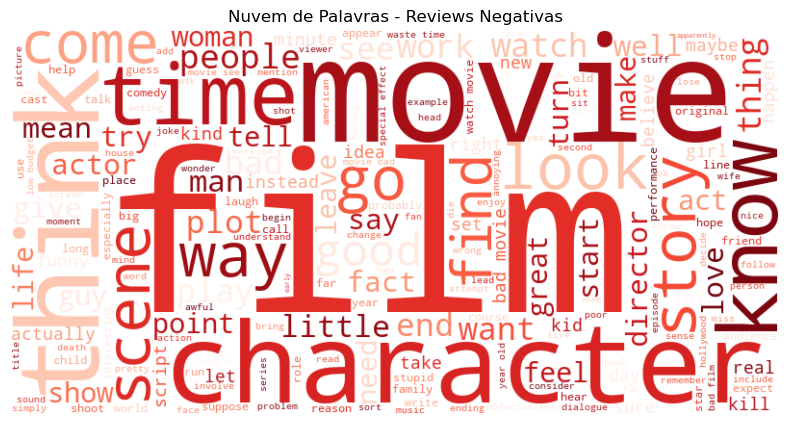

In [15]:
# 4. Nuvem de palavras
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens')\
    .generate(text_pos)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Reviews Positivas')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds')\
    .generate(text_neg)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Reviews Negativas')
plt.show()

# Resultado: As reviews negativas e positivas possuem palavras que aparecem com recorrência muito em comum 

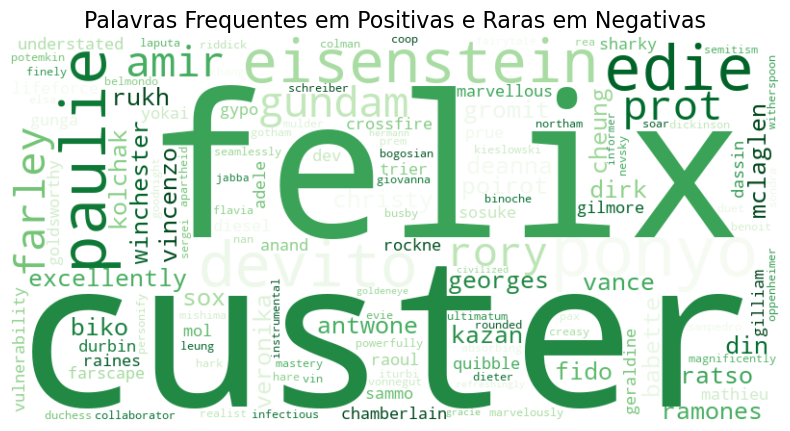

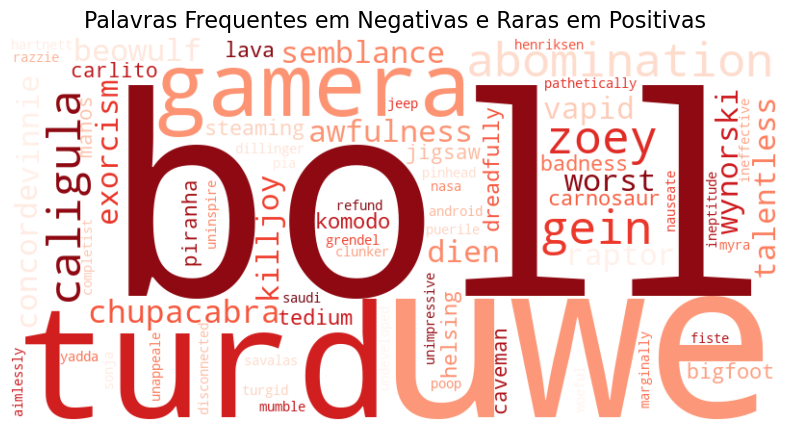

 Palavras mais frequentes em positivo e raras em negativo:
crossfire: 62
semitism: 56
anand: 59
instrumental: 43
mclaglen: 80
deanna: 75
durbin: 68
nan: 49
excellently: 91
babette: 78
leung: 47
cheung: 72
edie: 118
mathieu: 64
gotham: 50
civilized: 41
custer: 189
powerfully: 54
goldsworthy: 65
hare: 57

 Palavras mais frequentes em negativo e raras em positivo:
boll: 207
poop: 42
badness: 62
tedium: 61
jeep: 45
wynorski: 68
nasa: 47
turd: 122
pathetically: 53
turgid: 51
mumble: 53
helsing: 61
uninspire: 46
lava: 61
concorde: 64
manos: 55
unimpressive: 49
talentless: 65
ineffective: 46
jigsaw: 54


In [ ]:
# Palavras mais frequentes em POSITIVO e raras em NEGATIVO
unique_pos = {word: count for word, count in counter_pos.items() if count >= 20 and counter_neg[word] < 10}

# Palavras mais frequentes em NEGATIVO e raras em POSITIVO
unique_neg = {word: count for word, count in counter_neg.items() if count >= 20 and counter_pos[word] < 10}

# Gerar nuvem de palavras
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(unique_pos)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(unique_neg)

# Plotar nuvem positiva
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Palavras Frequentes em Positivas e Raras em Negativas", fontsize=16)
plt.axis('off')
plt.show()

# Plotar nuvem negativa
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Palavras Frequentes em Negativas e Raras em Positivas", fontsize=16)
plt.axis('off')
plt.show()

print(" Palavras mais frequentes em positivo e raras em negativo:")
for word, count in list(unique_pos.items())[:20]:
    print(f"{word}: {count}")

print("\n Palavras mais frequentes em negativo e raras em positivo:")
for word, count in list(unique_neg.items())[:20]:
    print(f"{word}: {count}")

# Resultado:
# Positivas: possuem elogios (excellently, powerfully, civilized, instrumental) e nomes próprios (deanna, durbin, edie, anand, cheung, mathieu)
# Negativas: possuem críticas (pathetically, badness, ineffective, unimpressive, talentless, uninspire, tedium)
# A maioria das palavras aparentemente ilegivéis são referentes a nomes próprios de filmes, atrizes, atores e diretores!
